# Pymaceuticals Inc.
---

### Analysis
The Pymaceuticals project focuses on studying the effects of multiple drug regimens on the growth of tumors in mice. This dataset provides insights into how different drugs, including Capomulin, affect tumor size over time. A significant part of the analysis involved exploring the effectiveness of the Capomulin regimen, a drug of particular interest. Charting the success or failure of these drugs thats why Data visualization is essential for revealing trends and patterns that might not be immediately obvious from summary statistics alone. 

Capomulin’s Effectiveness: Initial analysis suggests that the Capomulin regimen has a tangible impact on reducing tumor size over time. By tracking the tumor size of specific mice, we could visualize a steady decline, supporting the efficacy of the drug. The analysis shows that, at least in the example data, there is a perfect positive correlation between mouse weight and tumor volume. This suggests that larger mice tend to have larger tumors, although real-world data may show more nuanced trends. The identification and resolution of duplicate entries ensures that the analysis is based on accurate data. Duplicate records can distort the true relationship between variables, especially in time-series data like this.

Pymaceuticals dataset highlights the importance of data integrity, visualization, and statistical analysis in understanding the effects of drug regimens on tumor growth. The correlation between mouse weight and tumor volume, along with the observed impact of the Capomulin regimen, suggests promising directions for further research and drug development
 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combine_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [52]:
# Checking the number of mice.
combine_data = combine_data_df["Mouse ID"].nunique()
combine_data

249

In [54]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combine_data_df[combine_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [56]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_data = combine_data_df[combine_data_df['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combine_data_df[~combine_data_df['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [60]:
# Checking the number of mice in the clean DataFrame.
num_cleaned_mice = cleaned_df['Mouse ID'].nunique()
print(f"number of unique mice in the cleaned data: {num_cleaned_mice}")

number of unique mice in the cleaned data: 248


## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean_tumor_volume='mean',
    median_tumor_volume='median',
    tumor_volume_variance='var',
    tumor_volume_ste_dev='std',
    tumor_volume_sem='sem'
).reset_index()

summary_stats


,Drug Regimen,mean_tumor_volume,median_tumor_volume,tumor_volume_variance,tumor_volume_ste_dev,tumor_volume_sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [65]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = cleaned_df.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    tumor_volume_variance=('Tumor Volume (mm3)', 'var'),
    tumor_volume_std_dev=('Tumor Volume (mm3)', 'std'),
    tumor_volume_sem=('Tumor Volume (mm3)', 'sem')
).reset_index()

summary_stats_advanced


,Drug Regimen,mean_tumor_volume,median_tumor_volume,tumor_volume_variance,tumor_volume_std_dev,tumor_volume_sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

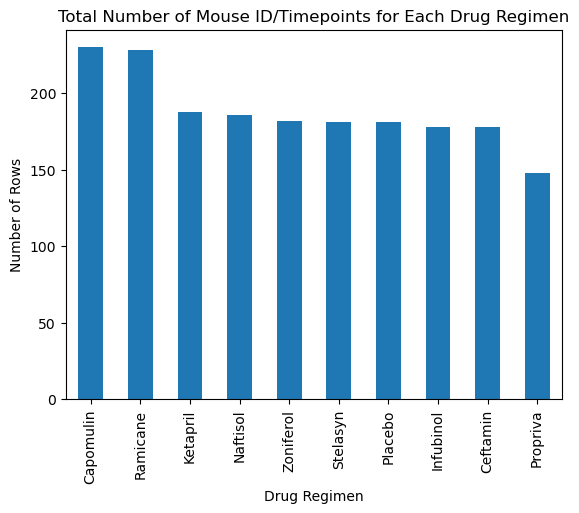

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_df['Drug Regimen'].value_counts()

regimen_counts.plot(kind='bar', title='Total Number of Mouse ID/Timepoints for Each Drug Regimen', xlabel='Drug Regimen', ylabel='Number of Rows')

plt.show()

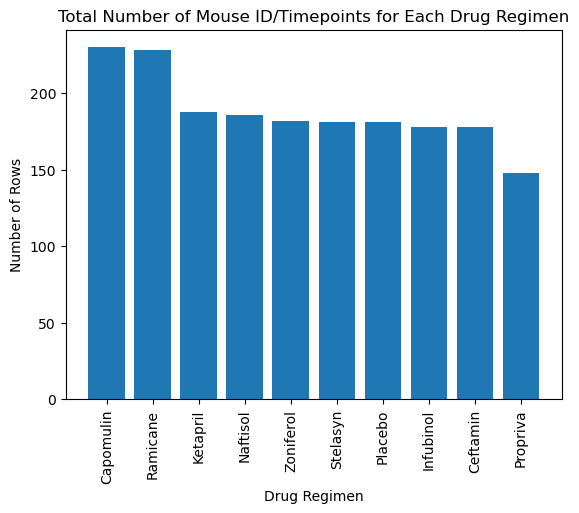

In [70]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

regimen_counts = cleaned_df['Drug Regimen'].value_counts()

plt.bar(regimen_counts.index, regimen_counts.values)

plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.xticks(rotation=90)

plt.show()

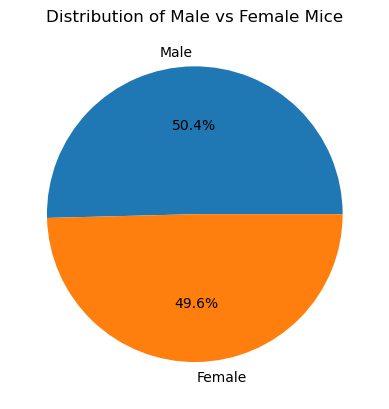

In [72]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_df.drop_duplicates(subset=['Mouse ID'])

gender_distribution = unique_mice['Sex'].value_counts()

gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Male vs Female Mice')

plt.ylabel('')

# Make the pie chart
plt.show()

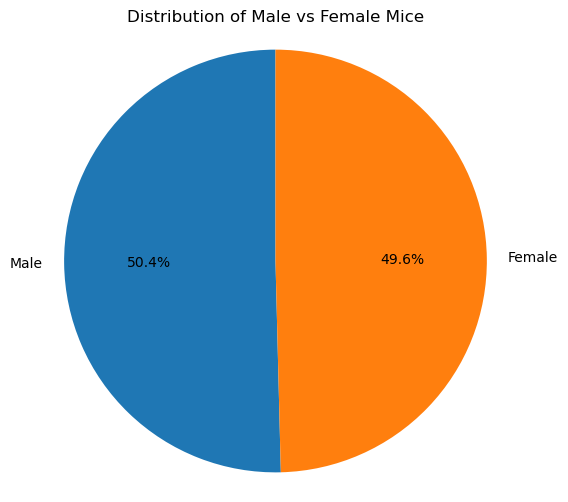

In [74]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_df.drop_duplicates(subset=['Mouse ID'])

gender_distribution = unique_mice['Sex'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Male vs Female Mice')

plt.axis('equal')

# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = cleaned_df[cleaned_df['Drug Regimen'].isin(treatment_list)]

max_timepoint_df = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(max_timepoint_df, filtered_df, on=['Mouse ID', 'Timepoint'])

final_tumor_vol_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [79]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for drug in treatment_list:
    drug_tumor_vols = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol_data.append(drug_tumor_vols)

    tumor_vol_data.append(drug_tumor_vols)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = drug_tumor_vols.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = drug_tumor_vols[(drug_tumor_vols < lower_bound) | (drug_tumor_vols > upper_bound)]

    print(f'{drug} treatment:')
    print(f'Lower bound: {lower_bound}')
    print(f'Upper bound: {upper_bound}')
    print(f'Potential outliers: {outliers}\n')


Capomulin treatment:
Lower bound: 20.70456164999999
Upper bound: 51.83201549
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane treatment:
Lower bound: 17.912664470000003
Upper bound: 54.30681135
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol treatment:
Lower bound: 36.83290494999999
Upper bound: 82.74144559000001
Potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin treatment:
Lower bound: 25.355449580000002
Upper bound: 87.66645829999999
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



Number of treatment labels: 4
Number of tumor volume datasets: 4


C:\Users\Dohns\AppData\Local\Temp\ipykernel_5328\1886075289.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatment_list, flierprops=dict(markerfacecolor='r', marker='o', markersize=12))


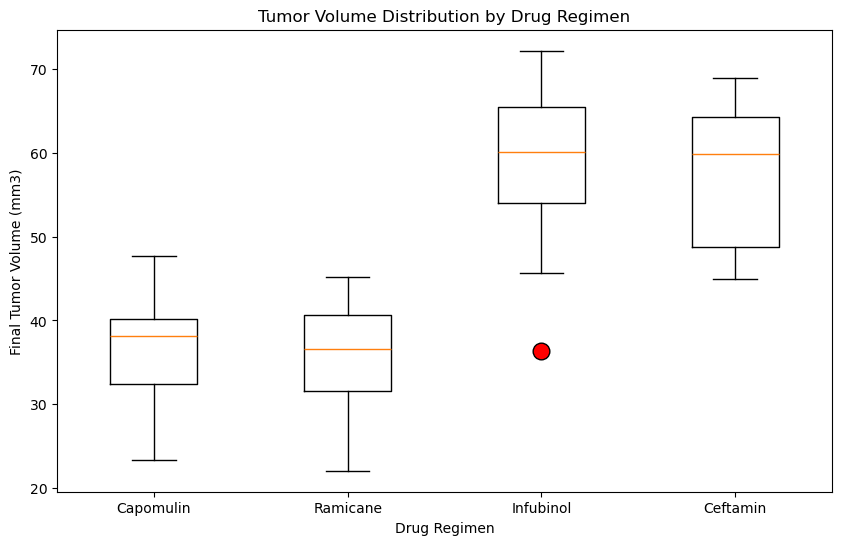

In [81]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_vol_data = []
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor_vols = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Add the tumor volumes to the list
    tumor_vol_data.append(drug_tumor_vols.values)

# Check if the number of drug regimens matches the tumor volume data
print(f"Number of treatment labels: {len(treatment_list)}")
print(f"Number of tumor volume datasets: {len(tumor_vol_data)}")

# If the lengths match, generate the box plot
if len(tumor_vol_data) == len(treatment_list):
    # Generate the box plot
    plt.figure(figsize=(10, 6))
    
    # Create a box plot for the tumor volumes in each treatment group
    plt.boxplot(tumor_vol_data, labels=treatment_list, flierprops=dict(markerfacecolor='r', marker='o', markersize=12))

    # Add titles and labels
    plt.title('Tumor Volume Distribution by Drug Regimen')
    plt.ylabel('Final Tumor Volume (mm3)')
    plt.xlabel('Drug Regimen')

    # Display the plot
    plt.show()
else:
    print("Error: The number of treatments and tumor volume datasets do not match.")

## Line and Scatter Plots

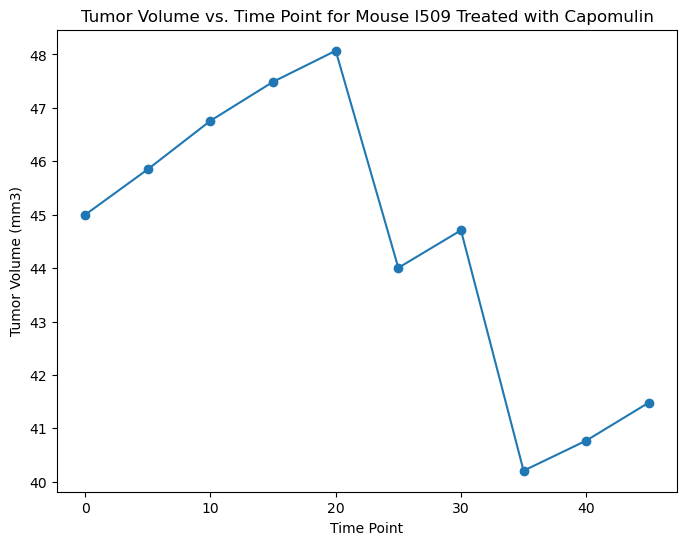

In [84]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_data = cleaned_df[(cleaned_df['Mouse ID'] == 'l509') & (cleaned_df['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(8, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')

plt.title('Tumor Volume vs. Time Point for Mouse l509 Treated with Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

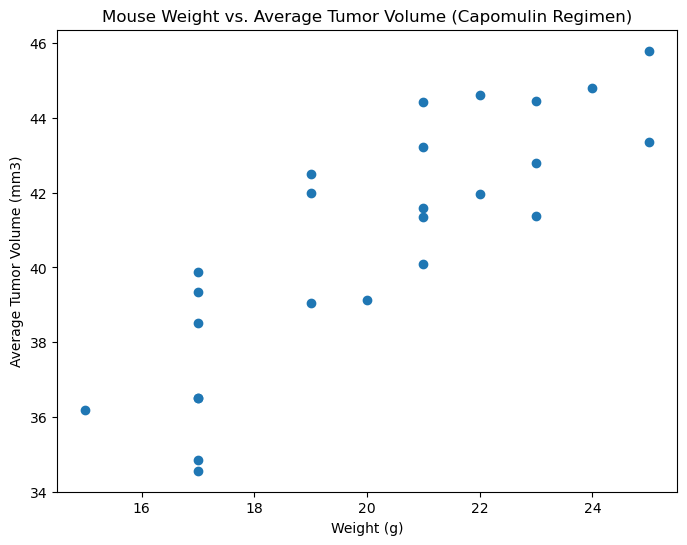

In [86]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

capomulin_avg_tumor_vol = capomulin_data.groupby('Mouse ID').agg(
    avg_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    weight=('Weight (g)', 'first')
).reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(capomulin_avg_tumor_vol['weight'], capomulin_avg_tumor_vol['avg_tumor_volume'], marker='o')

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.8419363424694722


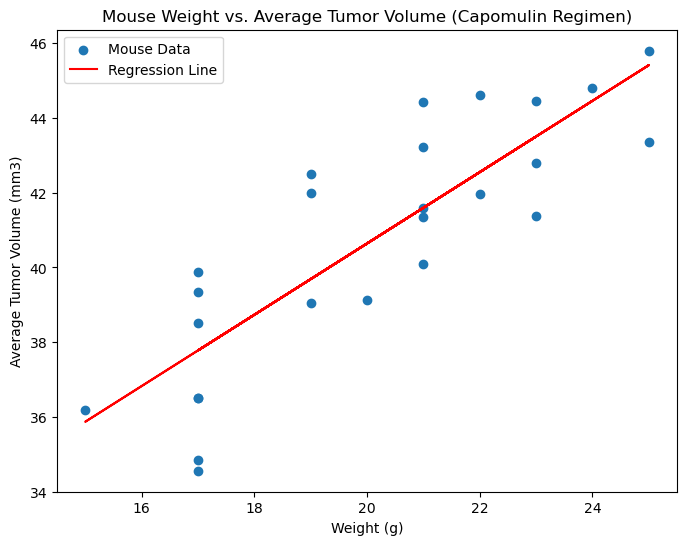

Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723


In [89]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

x_values = capomulin_avg_tumor_vol['weight']
y_values = capomulin_avg_tumor_vol['avg_tumor_volume']

correlation = x_values.corr(y_values)
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation}")

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, marker='o', label='Mouse Data')
plt.plot(x_values, slope * x_values + intercept, color='red', label='Regression Line')


plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.legend()

plt.show()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")